### 타이타닉 데이터세트 로딩하기

In [1]:
import pandas as pd

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Histogram
* 연속값에 대한 구간별 도수 분포를 시각화

### seaborn histogram
* seaborn의 예전 histogram은 distplot함수지만 deprecate됨. 
* seaborn의 histogram은 histplot과 displot이 대표적이며 histplot은 axes레벨, displot은 figure레벨임.

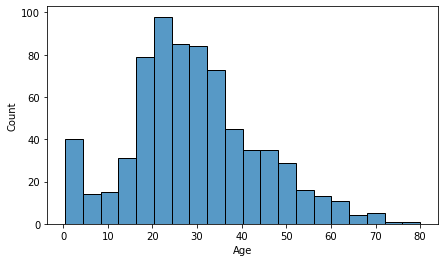

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시본에서도 plt.figure()의 figsize인자를 입력하여 전체 Figure의 크기 조절
plt.figure(figsize=(7, 4))
# Pandas DataFrame의 컬럼명을 자동으로 인식해서 xlabel값을 할당. ylabel 값은 histogram일때 Count 할당. 
sns.histplot(titanic_df['Age'], bins=20)
plt.show()

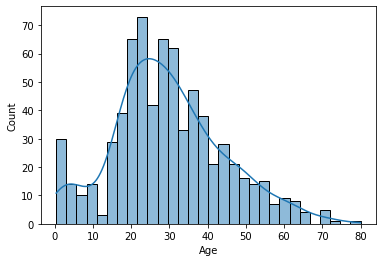

In [3]:
sns.histplot(x='Age', data=titanic_df, bins=30, kde=True)
plt.show()

<Figure size 576x288 with 0 Axes>

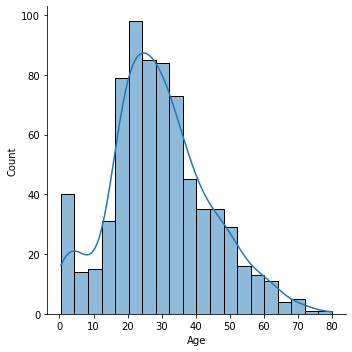

In [4]:
import seaborn as sns

# seaborn의 figure레벨 그래프는 plt.figure( )로 Figure 크기를 조절할 수 없습니다
plt.figure(figsize=(8, 4))
# Pandas DataFrame의 컬럼명을 자동으로 인식해서 xlabel값을 할당. ylabel 값은 histogram일때 Count 할당. 
sns.displot(x='Age', data=titanic_df, kde=True)
plt.show()

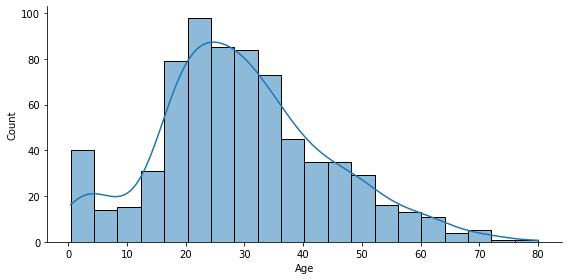

In [5]:
import seaborn as sns

sns.displot(titanic_df['Age'], kde=True, height=4, aspect=2)
plt.show()

### seaborn의 countplot은 카테고리 값에 대한 건수를 표현. x축이 카테고리값, y축이 해당 카테고리값에 대한 건수

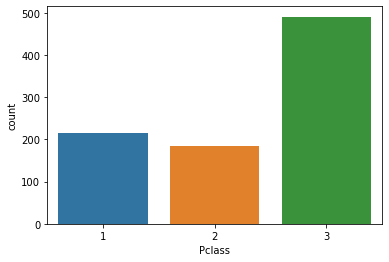

In [6]:
sns.countplot(x='Pclass', data=titanic_df)
plt.show()

### barplot
seaborn의 barplot은 x축은 이산값(주로 category값), y축은 연속값(y값의 평균/총합)을 표현

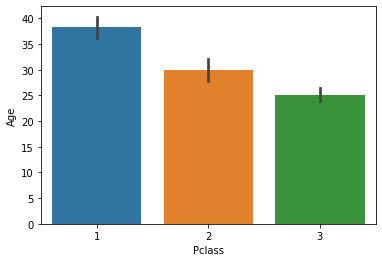

In [7]:
# 자동으로 xlabel, ylabel을 barplot( )의 x인자값인 Pclass, y인자값이 Age로 설정. 
sns.barplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

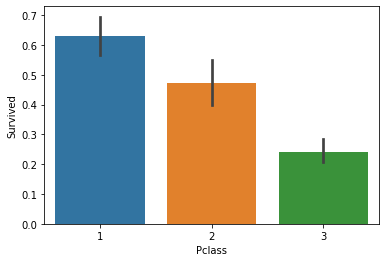

In [8]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.show()

[]

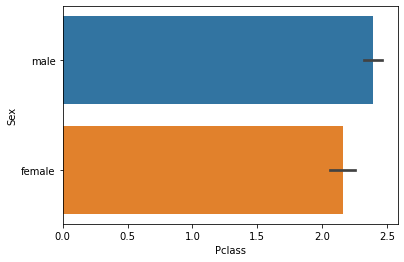

In [9]:
### y축을 문자값으로 설정하면 자동으로 수평 막대 그래프 변환
sns.barplot(x='Pclass', y='Sex', data=titanic_df)
plt.plot()

In [10]:
# x인자로 문자열인 Name을, y인자로 문자열인 Sex를 입력하므로 barplot은 오류를 발생. 
sns.barplot(x='Name', y='Sex', data=titanic_df)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
# confidence interval을 없애고, color를 통일.
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, color='green')

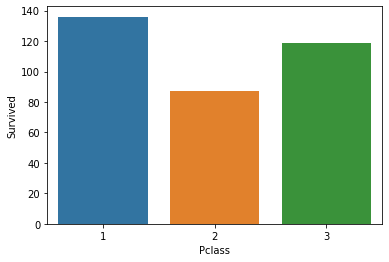

In [11]:
# estimator=sum을 적용하여 평균이 아니라 총합으로 표현.
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, estimator=sum)
plt.show()

### bar plot에서 hue를 이용하여 X값을 특정 컬럼별로 세분화하여 시각화 

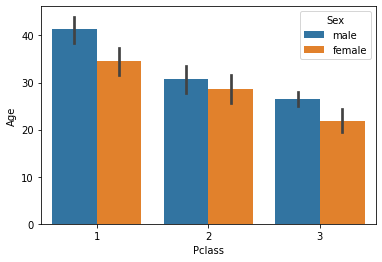

In [15]:
# 아래는 Pclass가 X축값이며 hue파라미터로 Sex를 설정하여 개별 Pclass 값 별로 Sex에 따른 Age 평균 값을 구함. 
sns.barplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

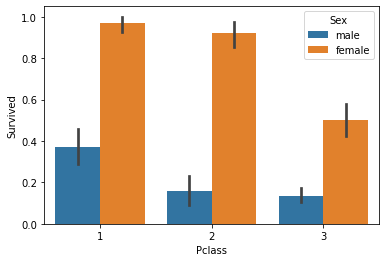

In [16]:
# 개별 Pclass 값 별로 Sex에 따른 Survived 평균 값을 구함.
# Pclass가 X축값이며 Survived가 Y축값. hue파라미터로 Sex를 설정 
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

### box plot
* 4분위를 박스 형태로 표현
* x축값에 이산값을 부여하면 이산값에 따른 box plot을 시각화

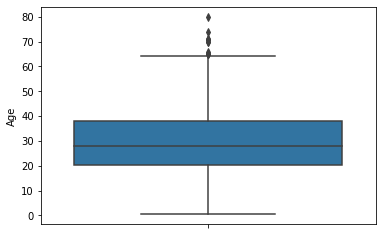

In [12]:
sns.boxplot(y='Age', data=titanic_df)
plt.show()

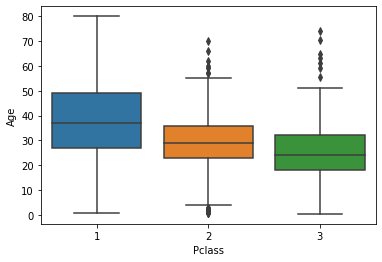

In [13]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

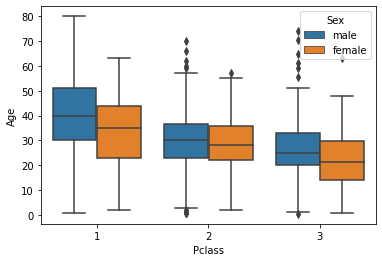

In [14]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

### 바이올린 플롯
* 단일 컬럼에 대해서는 히스토그램과 유사하게 연속값의 분포도를 시각화. 또한 중심에는 4분위를 알수있음. 
* 보통은 X축에 설정한 컬럼의 개별 이산값 별로 Y축 컬럼값의 분포도를 시각화하는 용도로 많이 사용 

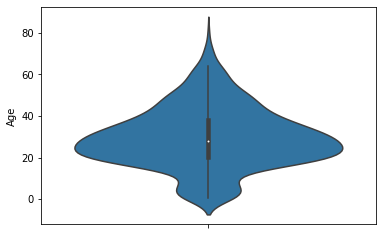

In [15]:
# Age 컬럼에 대한 수직 바이올린 플롯 시각화
sns.violinplot(y='Age', data=titanic_df)
plt.show()

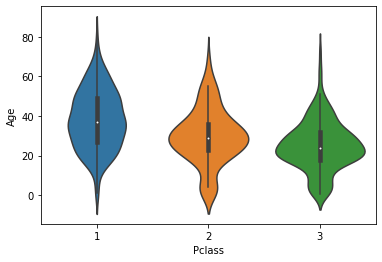

In [16]:
# x축값인 Pclass의 값별로 y축 값인 Age의 바이올린 플롯을 그림
# pClass값 별로 Age의 연속 확률분포 곡선과 박스플롯을 시각화하므로 pClass값별 Age 데이터 분포를 비교하여 볼수 있음.  
sns.violinplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

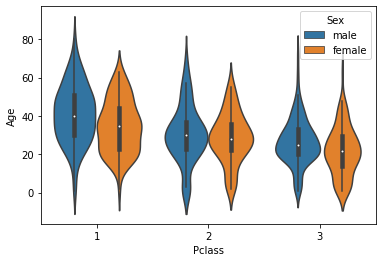

In [17]:
# x축값인 개별 Pclass내에서 Sex값 별로 y축 값인 Age의 바이올린 플롯을 그림 
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

### subplots를 이용하여 시본의 다양한 그래프를 시각화 하기

**subplots을 이용하여 주요 이산형 컬럼의 건수를 시각화 하기**

index: 0
index: 1
index: 2


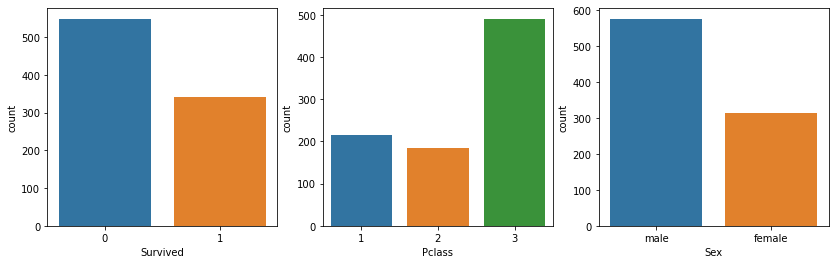

In [18]:
cat_columns = ['Survived', 'Pclass', 'Sex']

# nrows는 1이고 ncols는 컬럼의 갯수만큼인 subplots을 설정. 
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14, 4))

for index, column in enumerate(cat_columns):
    print('index:', index)
    # seaborn의 Axes 레벨 function들은 ax인자로 subplots의 어느 Axes에 위치할지 설정. 
    sns.countplot(x=column, data=titanic_df, ax=axs[index])

**subplots을 이용하여 주요 이산형 컬럼별로 생존율 시각화 하기**

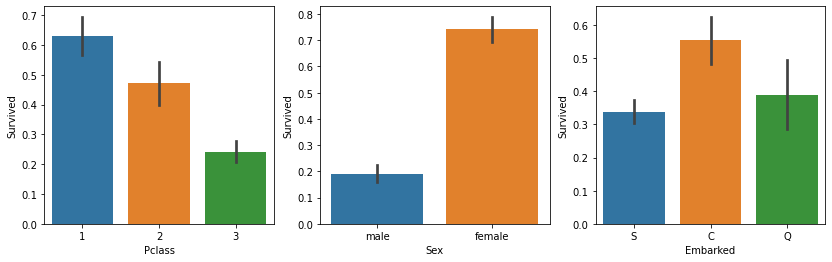

In [19]:
cat_columns = ['Pclass', 'Sex', 'Embarked']

# nrows는 1이고 ncols는 컬럼의 갯수만큼인 subplots을 설정. 
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14, 4))

for index, column in enumerate(cat_columns):
    # seaborn의 Axes 레벨 function들은 ax인자로 subplots의 어느 Axes에 위치할지 설정. 
    sns.barplot(x=column, y='Survived', data=titanic_df, ax=axs[index])

### subplots를 이용하여 여러 연속형 컬럼값들의 Survived 값에 따른 연속 분포도를 시각화
* 왼쪽에는 Violin Plot으로
* 오른쪽에는 Survived가 0일때의 Histogram과 Survived가 1일때의 Histogram을 함께 표현

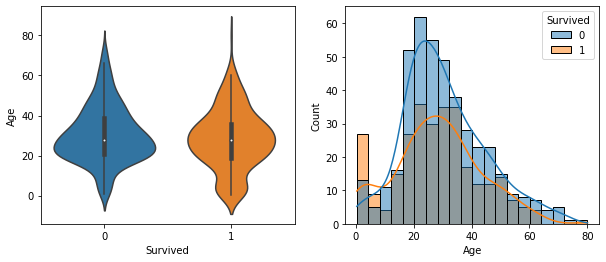

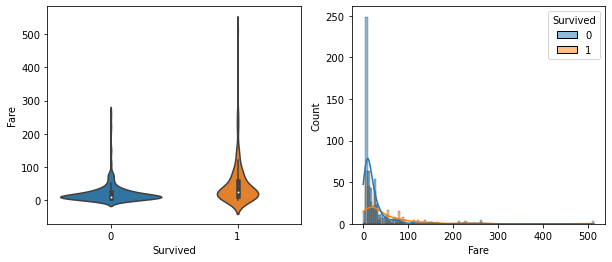

In [20]:
cont_columns = ['Age', 'Fare']

# 리스트로 할당된 컬럼들의 개수만큼 루프 수행.
for column in cont_columns:
    # 왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화 하기 위해 nrows는 1, ncols=2인 서브플롯 생성. 
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    # 왼쪽 Axes객체에는 Survived값 0, 1별 개별 컬럼의 바이올린 플롯 시각화.
    sns.violinplot(x='Survived', y=column, data=titanic_df, ax=axs[0])
    # 오른쪽 Axes객체에는 Survived 값에 따른 개별 컬럼의 히스토그램 시각화 
    sns.histplot(x=column, data=titanic_df, kde=True, hue='Survived', ax=axs[1])

### scatter plot
* 산포도로서 X와 Y축에 보통 연속형 값을 시각화. hue, style등을 통해 breakdown 정보를 표출할 수 있습니다. 

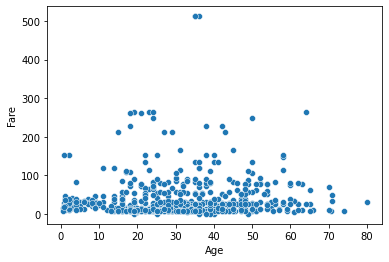

In [21]:
# X축값으로 Age를, Y축값으로 Fare를 설정
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.show()

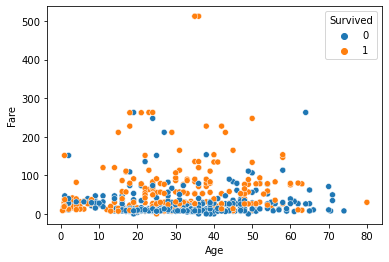

In [22]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.show()

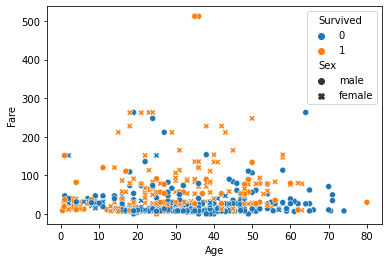

In [23]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_df)
plt.show()

### 상관 히트맵(Correlation Heatmap)
* 컬럼간의 상관도를 Heatmap형태로 표현

In [31]:
corr_df = titanic_df.corr()
corr_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


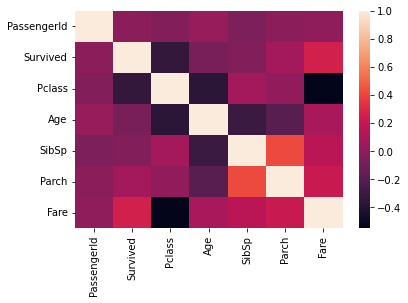

In [32]:
# 상관계수를 DataFrame으로 구하고 이를 heatmap()의 인자로 입력  
corr = titanic_df.corr()
sns.heatmap(corr)
plt.show()

<AxesSubplot:>

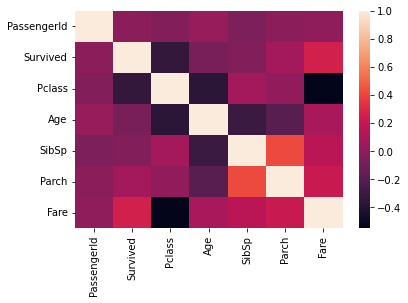

In [30]:
sns.heatmap(corr, cmap='rocket')

<AxesSubplot:>

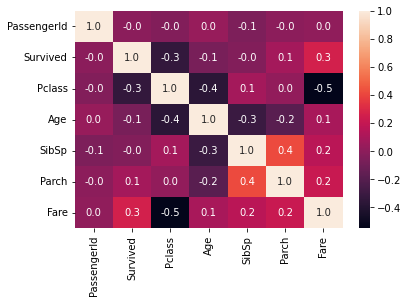

In [33]:
sns.heatmap(corr, annot=True, fmt='.1f', cbar=True)
plt.show()